In [210]:
import os
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
import os
from scipy import fft
from scipy.signal import stft
#os.getcwd()

In [88]:
direc = "/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/US_Reports/"
list_csv = sorted(os.listdir(direc))[2:]
us = []
for file in list_csv:
    sample = pd.read_csv(direc + file).set_index("Province_State")[["Confirmed", "Recovered", "Deaths"]].sort_values(by = "Confirmed", ascending = False)#"People_Hospitalized", 
    us.append(sample.drop(['Diamond Princess', 'Grand Princess']))
us = pd.concat(us, axis=1, join='inner') 
us_data = us.values.reshape(56,-1,3)
us_data[us_data != us_data] = 0#[:50]
us_data_diff = np.diff(us_data, axis = 1)#[:,:-20]
# us_data[us_data!=us_data] = 0
# us_data[:,:,1] += us_data[:,:,2]
# #us_data[:,:,0] -= us_data[:,:,1]
# # standardization
# population = pd.read_csv("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/population_states.csv", index_col=0)
# scaler = population.loc[us.index].values.reshape(56, 1, 1)*1e6
# scaler = scaler#[:50]
# us_data = us_data/scaler
# us_data = torch.from_numpy(us_data).float().to(device)
# #beta = torch.load("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/us_beta.pt")

In [89]:
def avg_std_timeseris(sequence, window):
    avgs = []
    stds = []
    for i in range(window, len(sequence)):
        avgs.append(np.mean(sequence[i-window:i]))
        stds.append(np.std(sequence[i-window:i]))
    return np.array(avgs), np.array(stds)

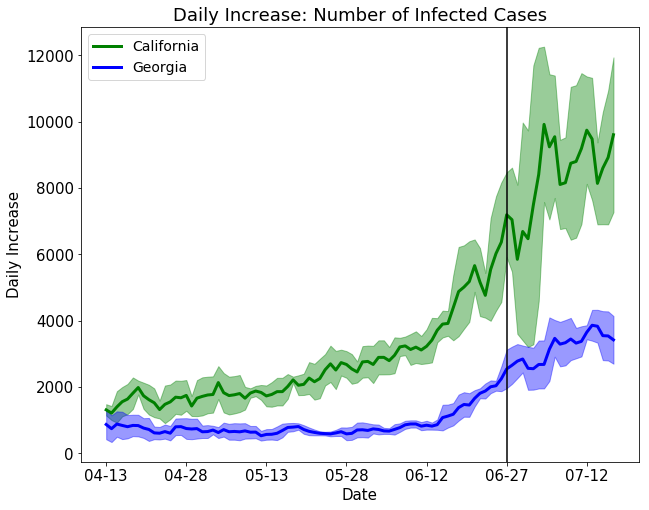

In [20]:
fig=plt.figure(figsize=(10, 8))
feat = 0
state = [5, 11]#9, 18#0, 4, 13, 17
avg, std = avg_std_timeseris(us_data_diff[state[0],:,feat], 5)
xidx = list(range(len(avg)))
plt.plot(xidx, avg, '-', color='green', linewidth = 3, label = us.index[state[0]])
plt.fill_between(xidx, avg - std, avg + std, color='green', alpha=0.4)

avg, std = avg_std_timeseris(us_data_diff[state[1],:,feat], 5)
plt.plot(xidx, avg, '-', color='blue', linewidth = 3, label = us.index[state[1]])
plt.fill_between(xidx, avg - std, avg + std, color='blue', alpha=0.4)
plt.axvline(75, color = "black")
# avg, std = avg_std_timeseris(us_data_diff[state[2],:,feat], 5)
# plt.plot(xidx, avg, '-', color='red', linewidth = 3, label = us.index[state[2]])
# plt.fill_between(xidx, avg - std, avg + std, color='red', alpha=0.4)

# avg, std = avg_std_timeseris(us_data_diff[state[3],:,feat], 5)
# plt.plot(xidx, avg, '-', color='black', linewidth = 3, label = us.index[state[3]])
# plt.fill_between(xidx, avg - std, avg + std, color='black', alpha=0.4)


plt.xticks(xidx[::15], [list_csv[i][:5] for i in xidx[::15]], fontsize=15)
plt.yticks(fontsize=15)
#plt.ylabel("RMSE("+ r'$10^3$'+")", size = 15)
plt.ylabel("Daily Increase", size = 15)
plt.xlabel("Date", size = 15)
plt.title("Daily Increase: Number of Infected Cases", size = 18)
plt.legend(loc = 2, fontsize =14)
#plt.ylim(-20,200)
plt.savefig("Infect_Cal_Geo.png", dpi = 400, bbox_inches = 'tight')

In [212]:
sst_data = torch.load("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/SST/temp_timeseries.pt")

In [217]:
len(data)

1460

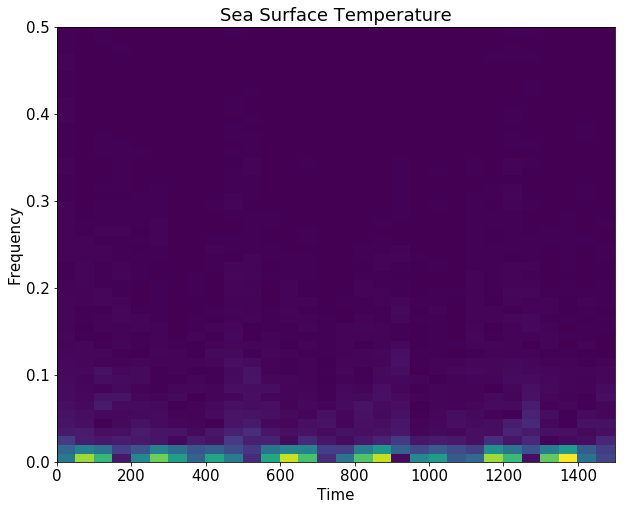

In [287]:
fig=plt.figure(figsize=(10, 8))

data = sst_data#avg_std_timeseris(, 5)[0]
data = (data - np.mean(data))/np.std(data)
f, t, Zxx = stft(data, fs=1, nperseg = 100)
plt.pcolormesh(t, f, np.abs(Zxx))
#freq = np.abs(stft(data)[0])
#plt.vlines(list(range(len(freq))), 0, freq, color='blue', linewidth = 3, label = "Sea Surface Temperature")#
#plt.plot(data, color='blue', linewidth = 3, label = "Sea Surface Temperature")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylabel("RMSE("+ r'$10^3$'+")", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xlabel("Time", size = 15)
#plt.xlabel("Time", size = 15)
plt.title("Sea Surface Temperature", size = 18)
#plt.legend(loc = 2, fontsize =20)
#plt.ylim(-20,200)
#plt.savefig("sst_fft.png", dpi = 400, bbox_inches = 'tight')

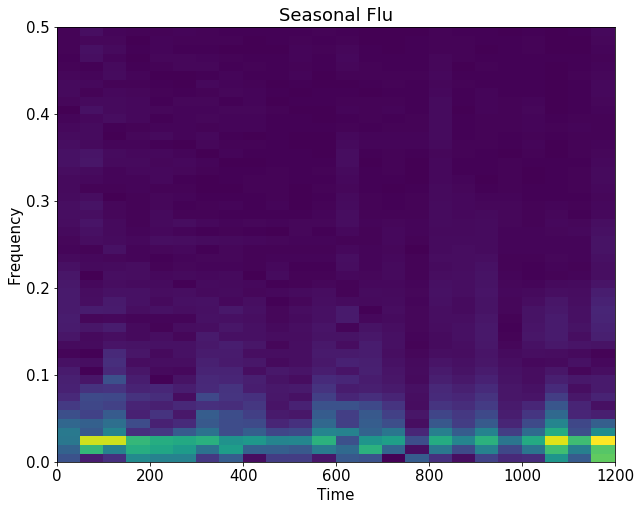

In [288]:
flu_data = pd.read_csv("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/ILINet.csv")
flu_data = np.array(flu_data[['% WEIGHTED ILI']]).T[0]
fig=plt.figure(figsize=(10, 8))

data = flu_data#, 5)avg_std_timeseris(
data = (data - np.mean(data))/np.std(data)
#freq = np.abs(stft(data)[2])
f, t, Zxx = stft(data, fs=1, nperseg = 100)
plt.pcolormesh(t, f, np.abs(Zxx))
#plt.vlines(list(range(len(freq)))[:len(freq)//2], 0, freq[:len(freq)//2], color='blue', linewidth = 3, label = "Seasonal Flu")#

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylabel("RMSE("+ r'$10^3$'+")", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xlabel("Time", size = 15)
plt.title("Seasonal Flu", size = 18)
#plt.legend(loc = 2, fontsize =20)
#plt.ylim(-20,200)
#plt.savefig("seasonal_flu.png", dpi = 400, bbox_inches = 'tight')

Text(0.5, 1.0, 'COVID-19')

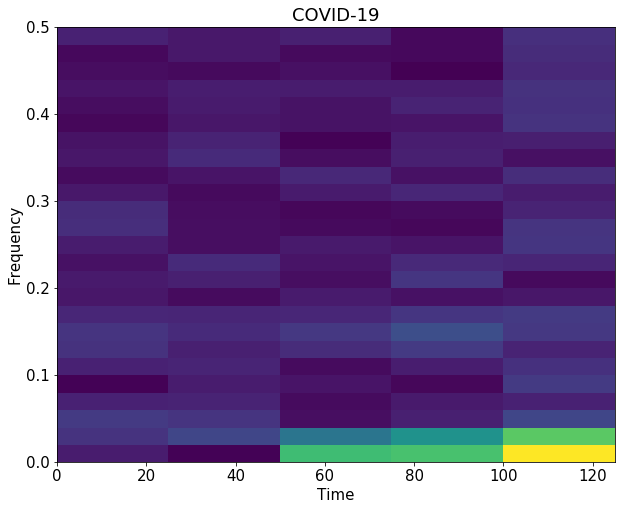

In [300]:
fig=plt.figure(figsize=(10, 8))
feat = 0
state = 14
data = us_data_diff[state,:,feat]
data = (data - np.mean(data))/np.std(data)
# freq = np.abs(stft(data)[0])#np.abs(fft(flu_data))# #
# plt.vlines(list(range(len(freq)))[:len(freq)//2], 0, freq[:len(freq)//2], color='blue', linewidth = 3, label = "COVID-" + us.index[state])
#plt.plot(data, color='blue', linewidth = 3, label = "COVID-" + us.index[state])
f, t, Zxx = stft(data, fs=1, nperseg = 50)
plt.pcolormesh(t, f, np.abs(Zxx))


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylabel("RMSE("+ r'$10^3$'+")", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xlabel("Time", size = 15)
plt.title("COVID-19", size = 18)
#plt.legend(loc = 2, fontsize =20)
#plt.ylim(-20,200)
#plt.savefig("COVID.png", dpi = 400, bbox_inches = 'tight')